In [0]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ylcai3so
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-ylcai3so
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=77807 sha256=3da4dc1a4048a23a9f4a15e1309ad96991ff929b3294637346977a5cba50096d
  Stored in directory: /tmp/pip-ephem-wheel-cache-oze0n0t1/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
from numpy import loadtxt
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [0]:
# load the dataset
from google.colab import files
uploaded = files.upload()
# dataset = loadtxt('ForwardTrain.csv', delimiter=',')
# test = loadtxt('ForwardTest.csv', delimiter=',')

Saving Finaldataset.csv to Finaldataset (1).csv


In [0]:
column_names = ['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','Radius','X','Y']
raw_dataset = pd.read_csv('Finaldataset.csv', names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)
dataset = raw_dataset.copy()    3creating  a copy of raw_dataset
dataset.tail()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,Radius,X,Y
681,303,333.08,362.77,391.29,417.10,437.29,447.25,441.10,413.87,365.31,303,0.04,0.15,0.11
682,303,336.14,369.15,401.51,431.80,456.98,471.59,467.87,438.10,380.07,303,0.04,0.15,0.12
683,303,338.98,375.14,411.32,446.37,477.24,497.74,498.13,467.17,398.63,303,0.04,0.15,0.13
684,303,341.49,380.54,420.36,460.25,497.32,524.58,530.58,501.20,422.20,303,0.04,0.15,0.14
685,303,343.66,385.27,428.53,473.27,516.89,551.06,561.72,538.46,452.67,303,0.04,0.15,0.15


In [0]:
train_dataset = dataset.sample(frac=0.90,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [1]:
train_stats = train_dataset.describe()
for i in range(0,11):
  train_stats.pop(column_names[i])
train_stats = train_stats.transpose()
train_stats

NameError: ignored

In [0]:
train_labels = train_dataset[column_names[0:11]]
test_labels = test_dataset[column_names[0:11]]
train_data = train_dataset[column_names[11:14]]
test_data = test_dataset[column_names[11:14]]

In [0]:
#Normalizing the model
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)
normed_test_data.tail()

,Radius,X,Y
646,0.807911,0.692214,-0.354188
653,0.807911,1.030911,-1.713655
659,0.807911,1.030911,0.325545
675,0.807911,1.708303,-1.713655
684,0.807911,1.708303,1.345145


In [0]:
#Building the model
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(11)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [0]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 11)                715       
Total params: 9,483
Trainable params: 9,483
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.01774188,  0.00330571,  0.00695387,  0.00976234,  0.00430807,
        -0.00129404,  0.00785259, -0.0141512 , -0.00037738, -0.01673544,
         0.01229695],
       [ 0.02000682,  0.00533921,  0.00555173,  0.00869929,  0.00824299,
        -0.00586109,  0.01253865, -0.01573508, -0.00026726, -0.0207056 ,
         0.01521075],
       [ 0.01851008,  0.00395742,  0.00379864,  0.00587002,  0.00541914,
        -0.00900864,  0.01439021, -0.01359549,  0.00526979, -0.01792994,
         0.01402309],
       [ 0.01988649,  0.00397182,  0.00234179,  0.00594075,  0.00539505,
        -0.00927307,  0.0141348 , -0.01611002,  0.0036145 , -0.01773097,
         0.01346314],
       [ 0.01832204,  0.0050785 ,  0.00457363,  0.00639652,  0.00650196,
        -0.00815035,  0.01401174, -0.0140118 ,  0.00296819, -0.0185787 ,
         0.01436781],
       [ 0.02150096,  0.00320047,  0.00677359,  0.01025179,  0.00589211,
         0.00131803,  0.00593262, -0.01408503, -0.00246993, -0.01441004,
         0.009

In [0]:
# EPOCHS = 2500

# history = model.fit(
#   normed_train_data, train_labels,
#   epochs=EPOCHS, validation_split = 0.2, verbose=0,
#   callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:8.6044,  mae:2.1478,  mse:8.6044,  val_loss:7.9910,  val_mae:1.8896,  val_mse:7.9910,  
....................................................................................................
Epoch: 100, loss:9.9656,  mae:2.2609,  mse:9.9656,  val_loss:8.7722,  val_mae:2.1092,  val_mse:8.7722,  
....................................................................................................
Epoch: 200, loss:9.8920,  mae:2.2697,  mse:9.8920,  val_loss:8.2081,  val_mae:1.9564,  val_mse:8.2081,  
....................................................................................................
Epoch: 300, loss:8.3548,  mae:2.1521,  mse:8.3548,  val_loss:13.7095,  val_mae:2.6673,  val_mse:13.7095,  
....................................................................................................
Epoch: 400, loss:8.0320,  mae:2.0410,  mse:8.0320,  val_loss:9.0930,  val_mae:2.1290,  val_mse:9.0930,  
......................................................................

Exception ignored in: <bound method IteratorResourceDeleter.__del__ of <tensorflow.python.data.ops.iterator_ops.IteratorResourceDeleter object at 0x7fa56b70beb8>>
Traceback (most recent call last):
  File "/tensorflow-2.1.0/python3.6/tensorflow_core/python/data/ops/iterator_ops.py", line 537, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/tensorflow-2.1.0/python3.6/tensorflow_core/python/ops/gen_dataset_ops.py", line 1139, in delete_iterator
    tld.op_callbacks, handle, deleter)
KeyboardInterrupt: 


..........................................
Epoch: 1400, loss:8.5594,  mae:2.1486,  mse:8.5594,  val_loss:8.8023,  val_mae:2.0067,  val_mse:8.8023,  
............................................................................

KeyboardInterrupt: ignored

In [0]:
EPOCHS = 2500
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=500)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:151702.4858,  mae:379.7210,  mse:151702.5000,  val_loss:143031.2525,  val_mae:370.0326,  val_mse:143031.2656,  
....................................................................................................
Epoch: 100, loss:415.4212,  mae:13.4968,  mse:415.4211,  val_loss:349.5953,  val_mae:12.6073,  val_mse:349.5953,  
....................................................................................................
Epoch: 200, loss:356.3069,  mae:12.0468,  mse:356.3069,  val_loss:311.1759,  val_mae:11.6069,  val_mse:311.1758,  
....................................................................................................
Epoch: 300, loss:225.7959,  mae:9.0140,  mse:225.7959,  val_loss:188.8628,  val_mae:8.3521,  val_mse:188.8628,  
....................................................................................................
Epoch: 400, loss:112.5056,  mae:6.6253,  mse:112.5056,  val_loss:89.2179,  val_mae:6.4180,  val_mse:89.2179,  
..............

In [0]:
hist = pd.DataFrame(early_history.history)
hist['epoch'] = early_history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
2495,11.775194,2.434874,11.775194,11.463103,2.465096,11.463102,2495
2496,10.901362,2.313420,10.901362,11.489938,2.279493,11.489938,2496
2497,9.613067,2.197733,9.613067,11.275904,2.451907,11.275903,2497
2498,10.533105,2.298921,10.533104,10.456450,2.235656,10.456450,2498
2499,10.242645,2.218652,10.242644,12.366536,2.404603,12.366536,2499


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MSE [Temperature^2]')

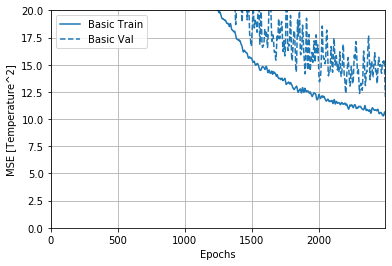

In [0]:
plotter.plot({'Basic': early_history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [Temperature^2]')

Text(0, 0.5, 'MAE [Temperature]')

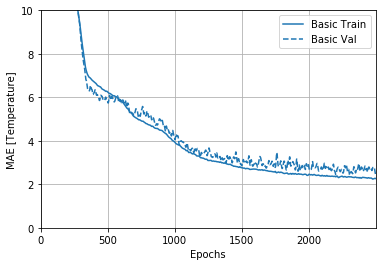

In [0]:
plotter.plot({'Basic': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Temperature]')

Text(0, 0.5, 'MAE [Temperature]')

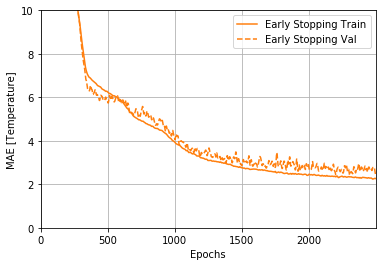

In [0]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Temperature]')

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Kelvin".format(mae))

69/69 - 0s - loss: 13.9823 - mae: 2.6813 - mse: 13.9823
Testing set Mean Abs Error:  2.68 Kelvin


In [0]:
test_predictions = model.predict(normed_test_data)
test_predictions_flat = model.predict(normed_test_data).flatten()
np.shape(test_predictions)
test_predictions_flat[1:1133:11]

array([327.89926, 348.44464, 370.10165, 384.0759 , 402.3035 , 415.0539 ,
       461.00284, 466.80417, 311.18683, 314.32565, 323.29266, 352.4022 ,
       329.1987 , 311.4591 , 320.3753 , 313.5654 , 323.45712, 325.0541 ,
       308.48224, 316.2008 , 313.52335, 317.82776, 309.3778 , 309.80356,
       310.4223 , 313.8617 , 356.06552, 311.15088, 341.8404 , 326.62244,
       341.05573, 334.04065, 310.90405, 311.12415, 321.31754, 317.85553,
       318.99283, 332.57916, 376.7127 , 346.15347, 356.7133 , 313.92606,
       331.64658, 332.86688, 327.91278, 339.7955 , 341.45236, 365.59695,
       402.3052 , 321.7227 , 319.94226, 336.69305, 315.68878, 317.81833,
       337.68195, 339.97525, 324.74667, 323.24136, 333.9628 , 341.8524 ,
       339.98068, 409.35034, 407.7468 , 381.78027, 344.79828, 320.68704,
       353.278  , 318.12845, 342.30258], dtype=float32)

In [0]:
test_labels['T2']
np.shape(test_labels)
test_labels_flat = test_labels.values.flatten()

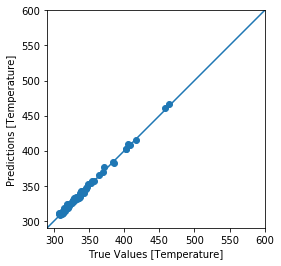

In [0]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels['T2'], test_predictions_flat[1:1133:11])
plt.xlabel('True Values [Temperature]')
plt.ylabel('Predictions [Temperature]')
lims = [290,600]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

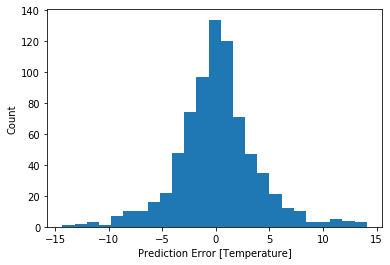

In [0]:
error = test_predictions_flat - test_labels_flat
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Temperature]")
_ = plt.ylabel("Count")